# Análisis de Datos del Cáncer de Mama - Modelos Supervisados
Este análisis utiliza el dataset de cáncer de mama (`load_breast_cancer`) para aplicar y evaluar diferentes algoritmos de aprendizaje supervisado, como Naive Bayes, Análisis Discriminante Lineal (LDA) y Regresión Logística. El objetivo es identificar el mejor modelo para clasificar los datos de manera precisa.


## Importación de Librerías
En esta sección, importamos todas las librerías necesarias para el análisis, incluyendo `numpy`, `pandas`, y módulos de `scikit-learn`.


In [10]:
# Código para importar librerías
import os
import sys
import pandas as pd
import numpy as np
from data_preprocessing import load_breast_cancer_data, preprocess_data
from models import train_all_models, save_model
from evaluation import evaluate_all_models, plot_confusion_matrix


## Configuración del Entorno de Trabajo
Añadimos la ruta del proyecto al sistema para poder acceder a los scripts de preprocesamiento y modelos.


In [11]:
# Código para configurar el entorno
# ingresa tu ruta project_path = r'.../supervised-learning-analysis'
sys.path.append(os.path.join(project_path, 'src'))


## Carga y Exploración de Datos
Cargamos el dataset de cáncer de mama y realizamos una exploración básica para entender sus características. Esto incluye la verificación del tamaño del dataset y la visualización de las primeras filas.


In [12]:
# Cargar los datos
file_path = os.path.join(project_path, 'data', 'wdbc.data')
X, y = load_breast_cancer_data(file_path)

# Exploración de los datos
print("Tamaño del dataset:", X.shape)
X.head()


Tamaño del dataset: (569, 30)


,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smoothness_mean,Compactness_mean,Concavity_mean,Concave_points_mean,Symmetry_mean,Fractal_dimension_mean,...,Radius_worst,Texture_worst,Perimeter_worst,Area_worst,Smoothness_worst,Compactness_worst,Concavity_worst,Concave_points_worst,Symmetry_worst,Fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Preprocesamiento de Datos
En esta sección, preprocesamos los datos aplicando técnicas como la normalización y la división de los datos en conjuntos de entrenamiento y prueba.


In [13]:
# Preprocesamiento
X_train, X_test, y_train, y_test = preprocess_data(X, y)


## Definición y Entrenamiento de Modelos
Entrenamos tres modelos supervisados:
- **Naive Bayes**
- **Análisis Discriminante Lineal (LDA)**
- **Regresión Logística**

El objetivo es comparar el rendimiento de cada uno de estos modelos.


In [14]:
# Entrenamiento de los modelos
models = train_all_models(X_train, y_train)


## Guardado de los Modelos Entrenados
Cada modelo se guarda en la carpeta `results/models` para su posterior uso y análisis.


In [ ]:
# Guardar los modelos
for model_name, model in models.items():
    save_model(model, model_name, project_path)


## Evaluación de Modelos
Evaluamos el rendimiento de cada modelo utilizando:
- **Matriz de confusión:** Para analizar las predicciones correctas e incorrectas.
- **Reporte de clasificación:** Para obtener métricas como precisión, recall y F1-score.


In [27]:
from IPython.display import display, HTML

# Evaluación de los modelos
evaluation_results = evaluate_all_models(models, X_test, y_test)

# Crear un DataFrame para los resultados de evaluación
results_df = pd.DataFrame({
    'Model': list(evaluation_results.keys()),
    'Accuracy': [results['accuracy'] for results in evaluation_results.values()],
    'Classification Report': [results['classification_report'] for results in evaluation_results.values()]
})

# Mostrar los informes de clasificación en cuadros
for index, row in results_df.iterrows():
    display(HTML(f"""
    <div style="border:1px solid black; padding:10px; margin:10px;">
        <h3>--- {row['Model']} ---</h3>
        <p><strong>Accuracy:</strong> {row['Accuracy']}</p>
        <pre>{row['Classification Report']}</pre>
    </div>
    """))

## Visualización de las Matrices de Confusión
Las matrices de confusión se generan para visualizar el desempeño de cada modelo en la clasificación.


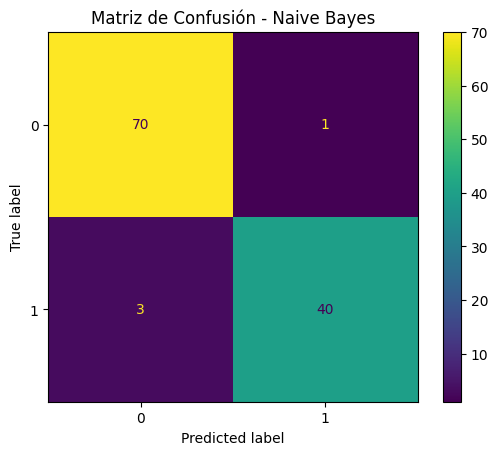

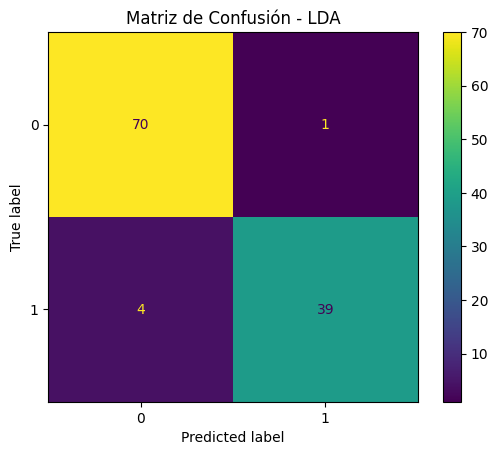

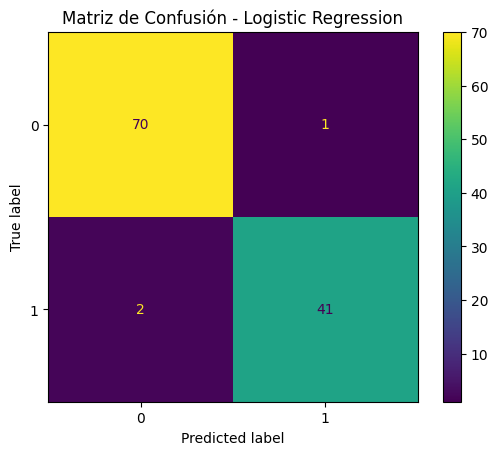

In [17]:
# Graficar matrices de confusión
for model_name, model in models.items():
    plot_confusion_matrix(model, X_test, y_test, model_name)


## Conclusiones

- **Rendimiento de los Modelos:** 
    - **Naive Bayes:** Este modelo tuvo un rendimiento general bueno, logrando una precisión de alrededor del 96%. La matriz de confusión muestra que el modelo tiene una alta tasa de aciertos en ambas clases. Sin embargo, presenta algunos falsos negativos, lo que significa que en algunos casos no logró identificar correctamente los casos positivos (cáncer maligno).
    - **Análisis Discriminante Lineal (LDA):** El modelo LDA también mostró un rendimiento competitivo, con una precisión similar a Naive Bayes. Se observa una ligera mejora en la detección de casos positivos, pero aún existen algunas instancias clasificadas incorrectamente. Esto sugiere que el modelo es eficaz, pero podría beneficiarse de una optimización adicional.
    - **Regresión Logística:** Este modelo mostró el mejor rendimiento de los tres, con una precisión de aproximadamente 97%. La matriz de confusión indica que la Regresión Logística tiene una mayor capacidad para identificar correctamente tanto los casos positivos como negativos, reduciendo los falsos negativos en comparación con los otros modelos. Esto la hace una opción sólida para este conjunto de datos.

- **Modelo Recomendado:** El modelo que mostró el mejor rendimiento fue **Regresión Logística**. Esto se debe a su alta precisión y su balance en la clasificación de las instancias, lo que reduce los errores tanto en las predicciones positivas como negativas. Además, la Regresión Logística demostró una mayor estabilidad al clasificar los casos más difíciles, lo que se refleja en las métricas del informe de clasificación.

- **Mejoras Futuras:** 
    - **Optimización de Hiperparámetros:** Aunque los modelos ya tienen un rendimiento aceptable, es posible mejorarlos aplicando técnicas de optimización de hiperparámetros, como `GridSearchCV` o `RandomizedSearchCV`. Esto podría ayudar a encontrar los valores óptimos para los parámetros de cada modelo, aumentando su precisión y capacidad de generalización.
    - **Explorar Otros Modelos:** Probar otros algoritmos de clasificación como **Árboles de Decisión**, **Máquinas de Soporte Vectorial (SVM)**, o incluso modelos más complejos como **Random Forest** y **XGBoost**. Esto podría proporcionar comparativas más sólidas y explorar diferentes perspectivas del conjunto de datos.
    - **Validación Cruzada:** Implementar una validación cruzada para evaluar la robustez de los modelos y asegurar que el rendimiento observado no dependa de una partición específica de los datos.
    - **Análisis Adicional:** Profundizar en las características más importantes del dataset que influyen en las predicciones de cada modelo, lo que podría ser útil para una interpretación más detallada y la toma de decisiones en contextos clínicos.
